# Natural Language Processing.
## Ein Anwendungsbeispiel bei juristischen Datenquellen.

****
#### Orestis Papantoniou

####  Erwerb und pre-processing von rohen Textdaten. 


Auf der Webseite des BGH kann man Rechtsprechung als PDF-Datei herunterladen.
Die Datei wird mit einem Python Package ausgelesen und für die weitere Verarbeitung vorbereitet.
Als Beispiel wird die BGH "Trommeleinheit" Entscheidung von 2017 dargestellt.

In [185]:
import PyPDF2
import re


Die unmitellbare Extraktion des Textes aus einer PDF gibt oft den Text in einer unreinen Form zurück.
 z.B. die erste Seite:
 
 

In [13]:
f = open('Trommeleinheit.pdf','rb')
pdf_text = []
pdf_reader = PyPDF2.PdfFileReader(f)
for p in range(pdf_reader.numPages):
    page = pdf_reader.getPage(p)   
    pdf_text.append(page.extractText())
f.close()
pdf_text[0]

'ECLI:DE:BGH:2017:241017UXZR55.16.0\n \n \nBUNDESGERICHTSHOF\n \nIM NAMEN DES VOLKES\n \nURTEIL\n \nX\n \nZR\n \n55/16\n \nVerkündet am \n24.\n \nOktober 2017\n \nAnderer\n \nJustiz\nangestellte\n \nals Urkundsbeamt\nin\n \nder Geschäftsstelle\n \nin dem Rechtsstreit\n \nNachschlagewerk:\n \nja\n \nBGHZ:\n \nja\n \nBGHR:\n \nja\n \n \n \nTrommeleinheit\n \nRichtlinie 2009/125/EG\n \nAus e\niner freiwilligen Vereinbarung, in der sich Unternehmen gegenüber der Europäischen \nKommission zur Einhaltung bestimmter Standards zum Zwecke des Umweltschutzes verpflic\nh-\ntet haben, um eine zwingende Regelung der Kommission gemäß Art.\n \n15 der Richtlinie \n2009/\n125/EG zu vermeiden, ergeben sich grundsätzlich keine Rechte Dritter.\n \nPatG §\n \n9 Satz\n \n2 Nr.\n \n1\n \na)\n \nFür die Beurteilung der Frage, ob der Austausch von Teilen einer mit Zustimmung des P\na-\ntentinhabers in Verkehr gebrachten Vorrichtung zum bestimmungsgemäßen Gebra\nuch g\ne-\nhört oder eine Neuherstellung darstell

 Eine standard Vorgehensweise würde folgende Formatierungsregeln anwenden:
 
  * alle Wörter mit Kleinbuchstaben umschreiben
  * alle Zahlen entfernen
  * alle Sonderzeichen und Symbole entfernen
  * alle überflüssige Leerzeichen entfernen

Allardings trägt die unkritische Anwendung von allgemeinen Formatierungsregen mit sich die Gefahr solche Bestandteilen zu entfernen, die aber im konkreten Fall eine große semantische Ladung haben.
Das Sonderzeichen **§** im Zusammenhang mit einer Ziffer verweist auf eine Rechtsvorschrift und das Zusammenauftreten (co-occurence) solcher Symbolen mit anderen Wörtern in juristischen Korpora ist ausschlaggebend für die semantische Analyse des sämtlichen Textes. Diese Feststellung gilt ebenso für die Zahlen und Sonderzeichen, die eine konrete Gerichtsentscheidung identifizieren, oder das Datum deren Verkündung konkretisieren. Gerade wenn man Urteile miteinander korreliert, will man Einblicke gewinnen, wie alle Textbestandteile in Beziehung mit bestimmten Schlüsselwörtern sthehen. In diesem Sinne, ist die Wortkombination "LG Düsseldorf" unterschiedlich als das Wort "Düsseldorf" zu behandeln.

### Multilingualismus


Ein weiteres Problem ist der Multilinguismus von Texten. Im Vorliegenden Urteil werden die Patentansprüche in der originalen Verfahrenssprache aufgezählt und daher sind ganze Textteilen auf Englisch geschrieben. Diese Abschnitten müssen entfernt werden. Im folgenden Abschnitt wird das Urteil erneut gelesen und grob verarbeitet werden, damit anschließend die Modellierung dargestellt werden kann.


In [260]:
def read(startPage, endPage):
    global text
    text = []
    cleanText = ""
    pdfFileObj = open('Trommeleinheit.pdf', 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    while startPage <= endPage:
        pageObj = pdfReader.getPage(startPage)
        text += pageObj.extractText()
        startPage += 1
    pdfFileObj.close()
    for myWord in text:
        if myWord != '\n':
            cleanText += myWord
    text = cleanText #text = cleanText.split()
    text = re.sub(r"ECLI:DE:BGH:2017:241017UXZR55.16.0",'',text)
    text = re.sub(r"\d{2}\s\d{2}\s\d{2}\s\d{2}\s\d{2}\s*-\s*\d+",'',text)
    text = re.sub(r"\d{2}\s\d{2}\s\d{2}\s\d{2}\s*-\s*\d+",'',text)
    text = re.sub(r"\d{2}\s\d{2}\s\d{2}",'',text)
    text = re.sub(r"-\s\d+\s\-",'',text)
    text = re.sub(r'\((\d+|\w{1,4})\)','',text)
    text = re.sub(r'\s\D[)]+','',text)
    text = re.sub(r'http://www.eurovaprint.eu/pages/voluntaryagreement','', text)
    matchList = re.findall(r"\w+-\w+",text)
    for m in matchList:
        new = m.replace("-","")
        text = text.replace(m,new)
    return text
    print(text)

In [357]:
read(2,2) # wir öffnen die dritte Seite:

' Tatbestand: Die Klägerin nimmt die Beklagten wegen unmittelbarer Patentverletzung durch den Vertrieb von wiederaufbereiteten Tonerkartuschen für Laserdrucker und dergleichen in Anspruch. Die Klägerin ist Inhaberin des mit Wirkung für die Bundesrepublik Deutschland erteilten europäischen Patents 2 087 407 (Klagepatents), das unter anderem eine fotosensitive Trommeleinheit für eine elektrofotografische Bilderzeugungsvorrichtung betrifft. Patentanspruch 1 lautet in der Verfahrenssprache: "An electrophotographic photosensitive drum unit  usable with a main assembly of an electrophotographic image forming apparatus, the main assembly including a driving shaft  to be driven by a motor, having a rotational force applying portion, wherein said electrophotographic drum unit is dismountable from the main assembly in a dismounting direction substantially perpendicular to an axial direction  of the driving shaft, said electrophotographic drum unit comprising: an electrophotographic photosensitiv

#### Gegenüberstellung des Rohtextes zu einem englischen Wortschatz:

In [188]:
import spacy
import en_core_web_md
from spacy_langdetect import LanguageDetector
nlp = en_core_web_md.load()
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

In [262]:
doc = nlp(text)
en_text = [sent for sent in doc.sents if sent._.language['language'] == 'en']

In [318]:
en_text = en_text[:len(en_text)-2] # das Wort "hat" wurde als englisches Wort anerkannt
en_text = en_text[1:]
en_text[0] = en_text[0][7:] # remove part in german, keep only in english
en_text[2] = en_text[2][9:-7]

#### Zusammenfassung aller Treffer:

In [353]:
en_text

["An electrophotographic photosensitive drum unit  usable with a main assembly of an electrophotographic image forming apparatus, the main assembly including a driving shaft  to be driven by a motor, having a rotational force applying portion, wherein said electrophotographic drum unit is dismountable from the main assembly in a dismounting direction substantially perpendicular to an axial direction  of the driving shaft, said electrophotographic drum unit comprising: an electrophotographic photosensitive drum  having a photosensitive layer  at a peripheral surface thereof, said electrophotographic photosensitive drum being rotatable about an axis  thereof; ii) a coupling member  rotatable about an axis  thereof, engageable with the driving shaft  to receive a rotational force, from the rotational force applying portion, for rotating said electrophotographic photosensitive drum  said coupling member is provided at an axial end of said electrophotographic photosensitive drum  such that 

In [333]:
for i in en_text:
    text = text.replace(i.text,'')    ## we remove the english parts from whole text

Hier werden alle Muster (Buchstaben-zahl-sonderzeichen-kombinationen) identifiziert aber erstmal entfernt. Der Umgang mit diesen Patterns und deren Bedeutung im juristischen Kontext wird auf einen späteren Zeitpunkt verschoben.

In [335]:
text = re.sub(r"§\s*\d{1,3}\s*Abs.\s*\d\s*ZPO",'',text)
text = re.sub(r'§\s*\d{2,3}\s*BGB','',text)
text = re.sub(r'\D\s*\D{2}\s*\d{2}/\d{2}','',text)
text = re.sub(r'\d{4}/\d{3}/\D{2}','',text)
text = re.sub(r'Art.\s*\d{1,3}','',text)
text = re.sub(r'Art.\s*\d{1,3}\s*Abs.\s*\d','',text)
text = re.sub(r'Art.\s*\d{1,3}\s*Abs.\s*\d\s*Buchst.\s*\D','',text)
text = re.sub(r'Art.\s*\d{1,3}\s*Satz\s*\d','',text)
text = re.sub(r'Art.\s*\d{1,3}\s*AEUV','',text)
text = re.sub(r'PatG\s*§\s*\d{1,}\s*Satz\s*\d\s*Nr.\s*\d','',text)
text = re.sub(r'GRUR\s*\d{4}','',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\W',' ',text)
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)
text = re.sub(r'\%=:/',' ',text)
text = re.sub(r'grur|rn.|bghz','',text)

Der Text muss nun zum größten Teil sauber und uniförmig sein. 

#### Stop Words.
Da grundsätzlich jedes Wort mit allen anderen korreliert wird, werden die Wörter (auch Tokens benannt) auf einem n-Dimensionalenraum repräsentiert, wobei jedes Token eine Anzahl von n-Vektoren besitzt. Nicht aber jedes Token gleich Informationen trägt; eine Mehrzahl von Wörtern -die Stoppwörter- weisen die Tendenz auf, häufiger aufzutreten; hingegen tragen sie zum sämtlichen Zusammenhang des Dokuments keine Rolle bei und daher müssen entfernt werden, damit der n-Dimensionaler Vektorraum auf die wichtigen Dimensionen redurziert werden kann. 
Die NLP Libraries stellen bereits Sätzen mit Stopwörtern für alle Sprachen zur Verfügung. Hierauf besteht aber erneut die Gefahr, Wörter auszuschließen die in der Sondersprache einer Branche andere Bedeutung tragen als sonst. Umgekehrt werden in der Regel Wörter, die unterrepräsentiert werden (wenn sie z.B. nur einmal unter 1000 Textdokumenten vorkommen), ebenso entfernt. Hierin könnte gleichwohl die Wahrscheinlichkeit stecken, die Seltenheit für den Domain von äußerst große Bedeutung zu sein.

In [340]:
import nltk
from nltk.corpus import stopwords

sentences = nltk.sent_tokenize(text, language='german')
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('german')]

In [341]:
stop_ger = stopwords.words('german')
print('\nDie Anzahl von Stoppwörter für die deutsche Sprache ist: {}'.format(len(stop_ger)))


Die Anzahl von Stoppwörter für die deutsche Sprache ist: 232


In [342]:
import random
print('\nBeispiel von 10 beliebigen deutschen Stopwörtern: \n\n{}'.format(random.sample(stop_ger, 10)))
print('\nAlle Stopwörter werden anschließend vom Textkorpus entfernt')


Beispiel von 10 beliebigen deutschen Stopwörtern: 

['welchen', 'wird', 'uns', 'kein', 'ins', 'selbst', 'von', 'alle', 'warst', 'sollte']

Alle Stopwörter werden anschließend vom Textkorpus entfernt


### Word Embeddings: Vektorization für jedes einzelnes Wort

Gensim ist eine Open Source Python Library, die die Benutzerdefinierte Entwicklung von Word Embeddings durch Trainig von eigenen Word2Vec Modellen ermöglicht.

In [343]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1) # default size=100.optional params:window=3, sg=1
words = model.wv.vocab

Wir erfahren, welche die zehn ähnlichsten Wörter zum Wort **Trommeleinheit** sind:

In [ ]:
similars = model.wv.most_similar('trommeleinheit')

Die hier benutzte Funktion **most_similar** kalkuliert die einfache **Euklidische Distanz**, die aber nicht für hochdimensionale Vektorräume geeignet ist. Dafür sollte die **Kosinus-Ähnlichkeit** angewendet werden; wegen Vereinfachung im Rahmen dieser Präsentation wird dies aber erstmal ignoriert. 

### Visualisierung

Anschließend wird der Versuch einer Visualisierung unternommen. Die Schwierigkeit besthet darin, dass eine effziente Visualisierung die Dimensionsreduzierung voraussetzt. Unterschidliche Algorithmen (z.B. PCA, t-SNE, TruncatedSVD) sind vorhanden mit dem Ziel so viele Dimensionen wie möglich auszublenden, ohne auf viel Information verzichten zu müssen. Im Rahmen dieser Präsentation wird das Problem der Dimensionsreduzierung nicht näher betrachtet. 

In [349]:
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

def similars_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='str')
    word_labels = [word]
    similars = model.wv.most_similar(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in similars:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0) #, metric='euclidean',perplexity=40
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

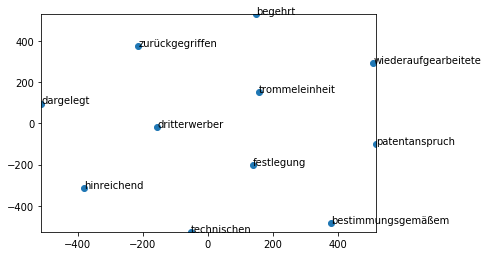

In [350]:
similars_tsnescatterplot(model, 'trommeleinheit', 100) 

Eine weitere -lockere- Visualisieringsmöglichkeit stellt die -dem Targetwort- ähnlichen Wörter als **Word Cloud** dar. Je höher die Ähnlichkeit (similarity score), desto größer die Wörter:

In [351]:
from wordcloud import WordCloud

def similars_cloud(w):
    
    plt.figure(figsize = (6,6), facecolor = None)
    similars = model.wv.most_similar(w,topn=15)
    data = [x[0] for x in similars]
    data = ' '.join(map(str, data))
    wc = WordCloud(width = 800, height = 800, 
                   background_color ='white', 
                   stopwords = stop_ger, 
                   min_font_size = 5).generate(data)  
    plt.imshow(wc,interpolation='bilinear') 
    plt.axis("off")
    plt.title(label="similarity cloud für: %s"%w.capitalize(),color="black",fontsize=15)
    plt.tight_layout(pad=0) 
  
    plt.show()

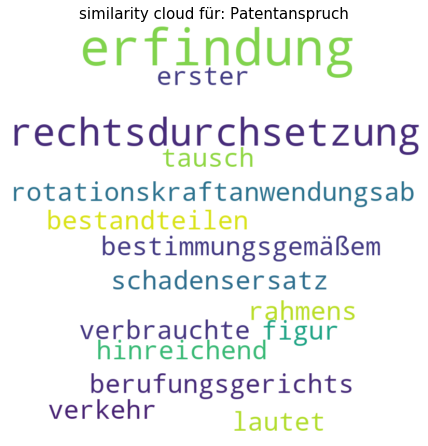

In [352]:
similars_cloud("patentanspruch") 